# 캐글 타이타닉 생존자 예측 데이터 분석

reference: https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb

## 데이터는 pandas를 통하여 분석한다.

In [1]:
import pandas as pd

In [2]:
# 데이터 경로
dataPath = "./data"

## pandas로 데이터를 읽어오자

In [3]:
train = pd.read_csv(dataPath + "/train.csv")
test = pd.read_csv(dataPath + "/test.csv")

### head()를 사용하면 상위 5개 데이터가 표현된다.

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 데이터 필드 설명

* Survived: 0 = No, 1 = Yes
* pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp: # of siblings / spouses aboard the Titanic. (형재자매 / 배우자)
* parch: # of parents / children aboard the Titanic
* ticket: Ticket number
* Fare: 여객운임
* cabin: Cabin number
* embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton (탑승한 항구)

## 데이터 크기 분석

In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

## 데이터 정보 확인

### 학습데이터에서는 missing data가 Age, Cabin, Embarked 컬럼에 존재

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### 테스트 데이터에서도 missing data가 Age, Fare, Cabin 컬럼에 존재

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### missing data를 좀 더 확인하자

In [10]:
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
test.isnull().head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False


In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # setting seaborn default for plots

In [15]:
def bar_chart_total(feature):
    # 해당 총탑승수당 feature 비율을 구한다.
    
    total_count = len(train[feature])
    total = train[feature].value_counts()/total_count
    
    print("**** Total ****")
    print(total)
    
    df = pd.DataFrame([total])
    df.index = ['total']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

In [16]:
def bar_chart(feature):
    
    total_survivied = train[train['Survived'] == 1]['Survived'].count()
    total_dead = len(train['Survived']) - total_survivied

    survived = train[train['Survived'] == 1][feature].value_counts()/total_survivied
    dead = train[train['Survived'] == 0][feature].value_counts()/total_dead
        
    print("**** Survived ****")
    print(survived)
    print()
    
    print("**** dead ****")
    print(dead)
    
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

**** Total ****
male      0.647587
female    0.352413
Name: Sex, dtype: float64


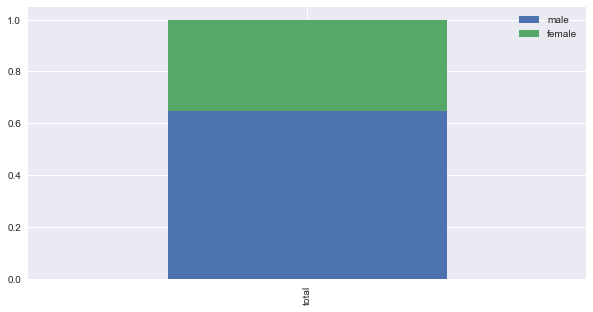

In [17]:
bar_chart_total('Sex')

**** Survived ****
female    0.681287
male      0.318713
Name: Sex, dtype: float64

**** dead ****
male      0.852459
female    0.147541
Name: Sex, dtype: float64


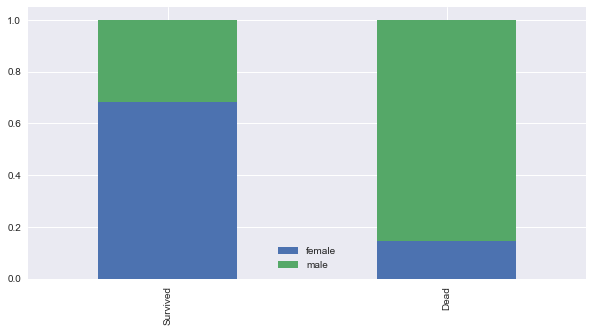

In [18]:
bar_chart('Sex')

#### 남자가 여자보다 많이 사망...

**** Total ****
3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


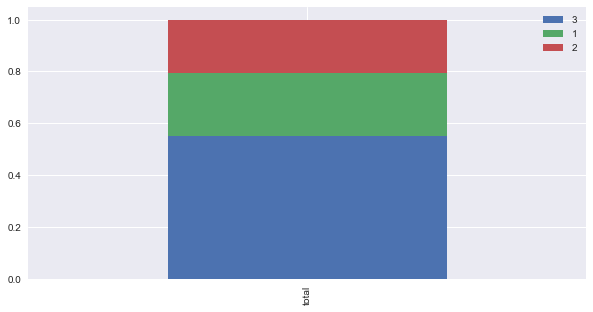

In [19]:
bar_chart_total('Pclass')

**** Survived ****
1    0.397661
3    0.347953
2    0.254386
Name: Pclass, dtype: float64

**** dead ****
3    0.677596
2    0.176685
1    0.145719
Name: Pclass, dtype: float64


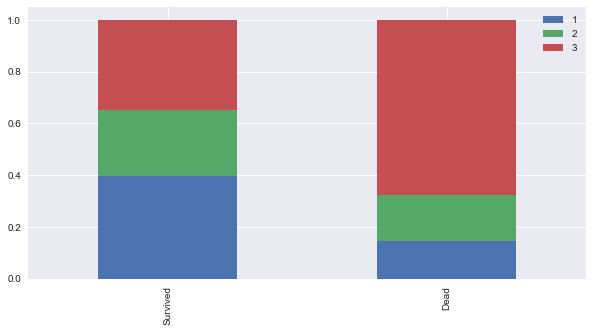

In [20]:
bar_chart('Pclass')

#### 3등급칸의 사망 비율이 높다.

**** Total ****
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64


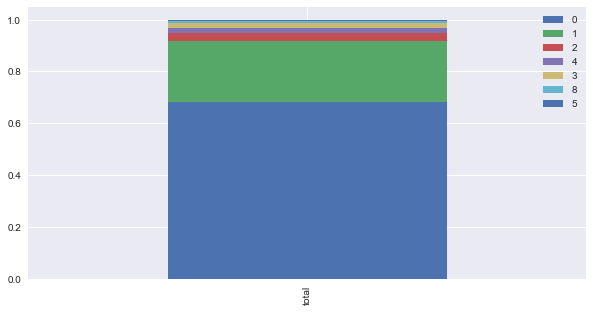

In [21]:
bar_chart_total('SibSp')

**** Survived ****
0    0.614035
1    0.327485
2    0.038012
3    0.011696
4    0.008772
Name: SibSp, dtype: float64

**** dead ****
0    0.724954
1    0.176685
4    0.027322
2    0.027322
3    0.021858
8    0.012750
5    0.009107
Name: SibSp, dtype: float64


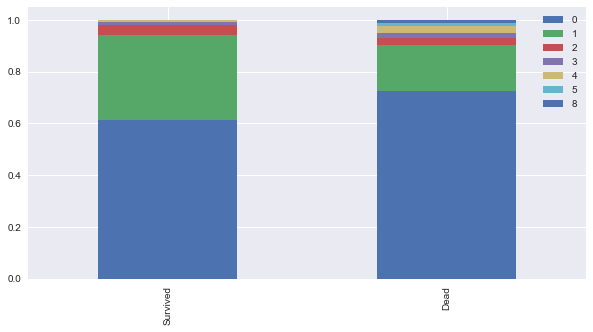

In [22]:
bar_chart('SibSp')

1. 형재자매/배우자 없이 혼자 탑승했던 사람의 사망율이 다소 높다.
2. 1명의 형재자매/배우자를 가진 사람의 생존율이 다소 높다. 
3. 대가족(5, 8)을 가진 사람들은 모두 사망하였다.

**** Total ****
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64


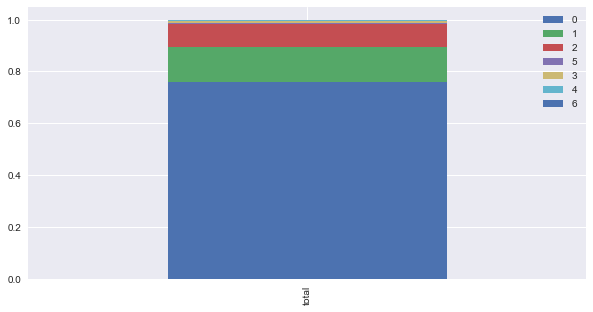

In [23]:
bar_chart_total('Parch')

**** Survived ****
0    0.681287
1    0.190058
2    0.116959
3    0.008772
5    0.002924
Name: Parch, dtype: float64

**** dead ****
0    0.810565
1    0.096539
2    0.072860
5    0.007286
4    0.007286
3    0.003643
6    0.001821
Name: Parch, dtype: float64


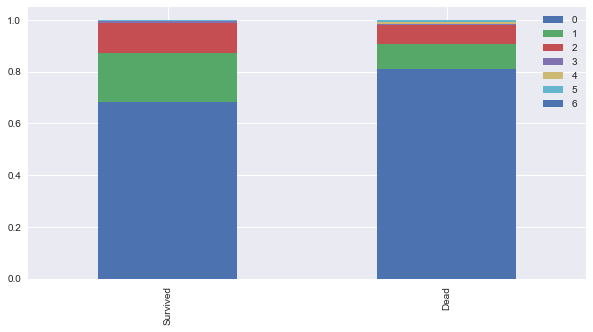

In [24]:
bar_chart('Parch')

1. 부모 자녀 없이 혼자 탑승했던 사람들의 사망률이 다소 높다.
2. 부모 자녀가 1명인 사람들의 생존률이 다소 높고, 사망률이 다소 낮다.

**** Total ****
S    0.722783
C    0.188552
Q    0.086420
Name: Embarked, dtype: float64


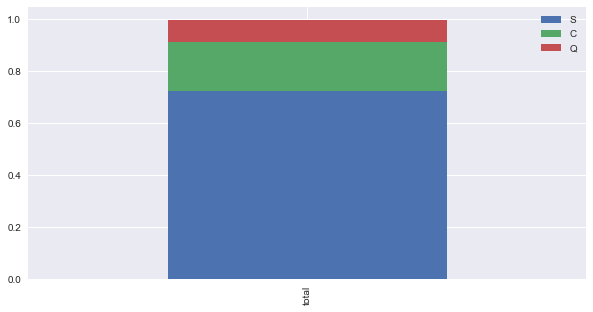

In [25]:
bar_chart_total('Embarked')

**** Survived ****
S    0.634503
C    0.271930
Q    0.087719
Name: Embarked, dtype: float64

**** dead ****
S    0.777778
C    0.136612
Q    0.085610
Name: Embarked, dtype: float64


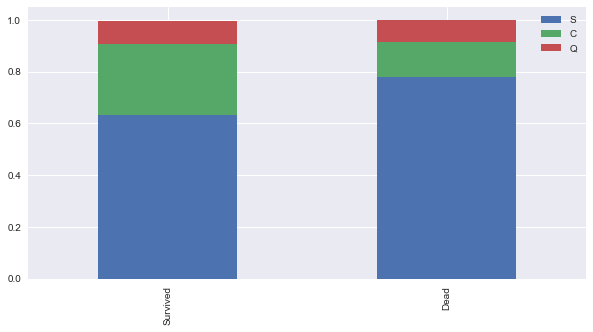

In [26]:
bar_chart('Embarked')

*. C = Cherbourg, Q = Queenstown, S = Southampton (탑승한 항구)
1. C(Cherbourg) 항구에서 탑승한 사람의 생존율이 다소 높고, 사망률이 다소 낮다.
2. S(Southampton) 항구에서 탑승한 사람의 생존율이 다소 낮고, 사망률이 다소 높다.

## Feature Engineering

모든 문자는 숫자의 형태로 만든다.

### Sex

성별은 모두 표시되어 있으므로, 0과 1 사이의 값으로 생성한다.

In [27]:
train_test_data = [train, test] # combining train and test dataset

In [28]:
sex_mapping = {"male": 0, "female": 1}

In [29]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


## PClass

In [31]:
Pclass_mapping = {1: 0, 2: 0.5, 3: 1}

In [32]:
for dataset in train_test_data:
    dataset['Pclass'] = dataset['Pclass'].map(Pclass_mapping)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1.0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,1.0,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,1.0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


## Name

이름은 크게 영향을 미치지 않을 것으로 판단되어, 제거한다.

In [34]:
train.drop(labels='Name', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1.0,0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,0.0,1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,1.0,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,0.0,1,35.0,1,0,113803,53.1000,C123,S
4,5,0,1.0,0,35.0,0,0,373450,8.0500,NaN,S


In [35]:
test.drop(labels='Name', axis=1, inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,1.0,0,34.5,0,0,330911,7.8292,NaN,Q
1,893,1.0,1,47.0,1,0,363272,7.0000,NaN,S
2,894,0.5,0,62.0,0,0,240276,9.6875,NaN,Q
3,895,1.0,0,27.0,0,0,315154,8.6625,NaN,S
4,896,1.0,1,22.0,1,1,3101298,12.2875,NaN,S


## Age

In [36]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

missing data가 있다. 이 부분을 채워줘야한다.
기존 나이와 구분하기 위하여 -1로 채워준다.

In [37]:
for dataset in train_test_data:
    dataset["Age"].fillna(-1, inplace=True)

In [38]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

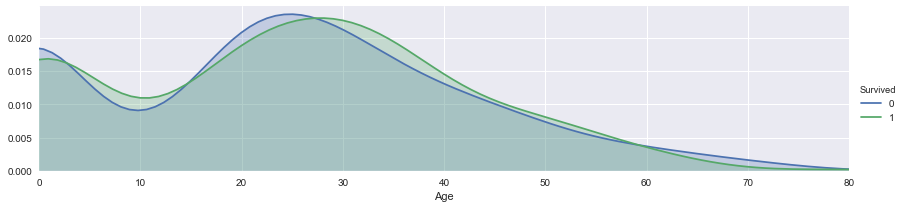

In [39]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

max와 min 값을 구한다.
구한 후, 0~1 사이로 normalize 한다.

In [40]:
def max_min_normalize(feature):
    max_value =  -1
    min_value = 100

    for dataset in train_test_data:
        if max(dataset[feature]) > max_value :
            max_value = max(dataset[feature])
        if min(dataset[feature]) < min_value :
            min_value = min(dataset[feature])

    print('max_', feature, ' = ', max_value)
    print('min_', feature, ' = ', min_value)

    for dataset in train_test_data:
        dataset[feature] = (dataset[feature]-min_value)/max_value


In [41]:
max_min_normalize('Age')

max_ Age  =  80.0
min_ Age  =  -1.0


In [42]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1.0,0,0.2875,1,0,A/5 21171,7.2500,NaN,S
1,2,1,0.0,1,0.4875,1,0,PC 17599,71.2833,C85,C
2,3,1,1.0,1,0.3375,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,0.0,1,0.4500,1,0,113803,53.1000,C123,S
4,5,0,1.0,0,0.4500,0,0,373450,8.0500,NaN,S


In [43]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,1.0,0,0.44375,0,0,330911,7.8292,NaN,Q
1,893,1.0,1,0.60000,1,0,363272,7.0000,NaN,S
2,894,0.5,0,0.78750,0,0,240276,9.6875,NaN,Q
3,895,1.0,0,0.35000,0,0,315154,8.6625,NaN,S
4,896,1.0,1,0.28750,1,1,3101298,12.2875,NaN,S


## SibSp

Sibsp도 마찬가지로 max와 min 값을 구하여 0~1 사이로 매핑한다.

In [44]:
max_min_normalize('SibSp')

max_ SibSp  =  8
min_ SibSp  =  0


In [45]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1.0,0,0.2875,0.125,0,A/5 21171,7.2500,NaN,S
1,2,1,0.0,1,0.4875,0.125,0,PC 17599,71.2833,C85,C
2,3,1,1.0,1,0.3375,0.000,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,0.0,1,0.4500,0.125,0,113803,53.1000,C123,S
4,5,0,1.0,0,0.4500,0.000,0,373450,8.0500,NaN,S


In [46]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,1.0,0,0.44375,0.000,0,330911,7.8292,NaN,Q
1,893,1.0,1,0.60000,0.125,0,363272,7.0000,NaN,S
2,894,0.5,0,0.78750,0.000,0,240276,9.6875,NaN,Q
3,895,1.0,0,0.35000,0.000,0,315154,8.6625,NaN,S
4,896,1.0,1,0.28750,0.125,1,3101298,12.2875,NaN,S


## Parch

Parch도 마찬가지로 max와 min 값을 구하여 0~1 사이로 매핑한다.

In [47]:
max_min_normalize('Parch')

max_ Parch  =  9
min_ Parch  =  0


In [48]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1.0,0,0.2875,0.125,0.0,A/5 21171,7.2500,NaN,S
1,2,1,0.0,1,0.4875,0.125,0.0,PC 17599,71.2833,C85,C
2,3,1,1.0,1,0.3375,0.000,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,0.0,1,0.4500,0.125,0.0,113803,53.1000,C123,S
4,5,0,1.0,0,0.4500,0.000,0.0,373450,8.0500,NaN,S


In [49]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,1.0,0,0.44375,0.000,0.000000,330911,7.8292,NaN,Q
1,893,1.0,1,0.60000,0.125,0.000000,363272,7.0000,NaN,S
2,894,0.5,0,0.78750,0.000,0.000000,240276,9.6875,NaN,Q
3,895,1.0,0,0.35000,0.000,0.000000,315154,8.6625,NaN,S
4,896,1.0,1,0.28750,0.125,0.111111,3101298,12.2875,NaN,S


## Ticket

Ticket에서 뒤에 숫자부분을 얻어온다.

In [50]:
for dataset in train_test_data:
    reverse_ticket = dataset['Ticket'].str[::-1]
    extractNum = reverse_ticket.str.extract('([0-9]+)', expand=False)
    dataset['TicketNum'] = extractNum.str[::-1]

In [51]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketNum
0,1,0,1.0,0,0.2875,0.125,0.0,A/5 21171,7.2500,NaN,S,21171
1,2,1,0.0,1,0.4875,0.125,0.0,PC 17599,71.2833,C85,C,17599
2,3,1,1.0,1,0.3375,0.000,0.0,STON/O2. 3101282,7.9250,NaN,S,3101282
3,4,1,0.0,1,0.4500,0.125,0.0,113803,53.1000,C123,S,113803
4,5,0,1.0,0,0.4500,0.000,0.0,373450,8.0500,NaN,S,373450


In [52]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketNum
0,892,1.0,0,0.44375,0.000,0.000000,330911,7.8292,NaN,Q,330911
1,893,1.0,1,0.60000,0.125,0.000000,363272,7.0000,NaN,S,363272
2,894,0.5,0,0.78750,0.000,0.000000,240276,9.6875,NaN,Q,240276
3,895,1.0,0,0.35000,0.000,0.000000,315154,8.6625,NaN,S,315154
4,896,1.0,1,0.28750,0.125,0.111111,3101298,12.2875,NaN,S,3101298


#### TicketNum의 첫 글자를 feature로 한다.

In [53]:
for dataset in train_test_data:
    dataset['TicketFirstChar'] = dataset['TicketNum'].str.get(0)
    dataset['TicketFirstChar'] = pd.to_numeric(dataset['TicketFirstChar'], downcast='float')

In [54]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketNum,TicketFirstChar
0,1,0,1.0,0,0.2875,0.125,0.0,A/5 21171,7.2500,NaN,S,21171,2.0
1,2,1,0.0,1,0.4875,0.125,0.0,PC 17599,71.2833,C85,C,17599,1.0
2,3,1,1.0,1,0.3375,0.000,0.0,STON/O2. 3101282,7.9250,NaN,S,3101282,3.0
3,4,1,0.0,1,0.4500,0.125,0.0,113803,53.1000,C123,S,113803,1.0
4,5,0,1.0,0,0.4500,0.000,0.0,373450,8.0500,NaN,S,373450,3.0


In [55]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketNum,TicketFirstChar
0,892,1.0,0,0.44375,0.000,0.000000,330911,7.8292,NaN,Q,330911,3.0
1,893,1.0,1,0.60000,0.125,0.000000,363272,7.0000,NaN,S,363272,3.0
2,894,0.5,0,0.78750,0.000,0.000000,240276,9.6875,NaN,Q,240276,2.0
3,895,1.0,0,0.35000,0.000,0.000000,315154,8.6625,NaN,S,315154,3.0
4,896,1.0,1,0.28750,0.125,0.111111,3101298,12.2875,NaN,S,3101298,3.0


#### TicketNum의 글자수를 feature로 한다.

In [56]:
for dataset in train_test_data:
    dataset['TicketNumSize'] = dataset['TicketNum'].str.len()

In [57]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketNum,TicketFirstChar,TicketNumSize
0,1,0,1.0,0,0.2875,0.125,0.0,A/5 21171,7.2500,NaN,S,21171,2.0,5.0
1,2,1,0.0,1,0.4875,0.125,0.0,PC 17599,71.2833,C85,C,17599,1.0,5.0
2,3,1,1.0,1,0.3375,0.000,0.0,STON/O2. 3101282,7.9250,NaN,S,3101282,3.0,7.0
3,4,1,0.0,1,0.4500,0.125,0.0,113803,53.1000,C123,S,113803,1.0,6.0
4,5,0,1.0,0,0.4500,0.000,0.0,373450,8.0500,NaN,S,373450,3.0,6.0


In [58]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TicketNum,TicketFirstChar,TicketNumSize
0,892,1.0,0,0.44375,0.000,0.000000,330911,7.8292,NaN,Q,330911,3.0,6
1,893,1.0,1,0.60000,0.125,0.000000,363272,7.0000,NaN,S,363272,3.0,6
2,894,0.5,0,0.78750,0.000,0.000000,240276,9.6875,NaN,Q,240276,2.0,6
3,895,1.0,0,0.35000,0.000,0.000000,315154,8.6625,NaN,S,315154,3.0,6
4,896,1.0,1,0.28750,0.125,0.111111,3101298,12.2875,NaN,S,3101298,3.0,7


#### Ticket과 TicketNum은 제거한다.

In [59]:
train.drop(labels='Ticket', axis=1, inplace=True)
train.drop(labels='TicketNum', axis=1, inplace=True)

test.drop(labels='Ticket', axis=1, inplace=True)
test.drop(labels='TicketNum', axis=1, inplace=True)

In [60]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,TicketFirstChar,TicketNumSize
0,1,0,1.0,0,0.2875,0.125,0.0,7.2500,NaN,S,2.0,5.0
1,2,1,0.0,1,0.4875,0.125,0.0,71.2833,C85,C,1.0,5.0
2,3,1,1.0,1,0.3375,0.000,0.0,7.9250,NaN,S,3.0,7.0
3,4,1,0.0,1,0.4500,0.125,0.0,53.1000,C123,S,1.0,6.0
4,5,0,1.0,0,0.4500,0.000,0.0,8.0500,NaN,S,3.0,6.0


In [61]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,TicketFirstChar,TicketNumSize
0,892,1.0,0,0.44375,0.000,0.000000,7.8292,NaN,Q,3.0,6
1,893,1.0,1,0.60000,0.125,0.000000,7.0000,NaN,S,3.0,6
2,894,0.5,0,0.78750,0.000,0.000000,9.6875,NaN,Q,2.0,6
3,895,1.0,0,0.35000,0.000,0.000000,8.6625,NaN,S,3.0,6
4,896,1.0,1,0.28750,0.125,0.111111,12.2875,NaN,S,3.0,7


null 데이터 체크를 한다.

In [62]:
train.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Sex                  0
Age                  0
SibSp                0
Parch                0
Fare                 0
Cabin              687
Embarked             2
TicketFirstChar      4
TicketNumSize        4
dtype: int64

In [63]:
test.isnull().sum()

PassengerId          0
Pclass               0
Sex                  0
Age                  0
SibSp                0
Parch                0
Fare                 1
Cabin              327
Embarked             0
TicketFirstChar      0
TicketNumSize        0
dtype: int64

null 데이터를 0 채운다.

In [64]:
for dataset in train_test_data:
    dataset['TicketFirstChar'] = dataset['TicketFirstChar'].fillna(0)
    dataset['TicketNumSize'] = dataset['TicketNumSize'].fillna(0)

In [65]:
train.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Sex                  0
Age                  0
SibSp                0
Parch                0
Fare                 0
Cabin              687
Embarked             2
TicketFirstChar      0
TicketNumSize        0
dtype: int64

In [66]:
test.isnull().sum()

PassengerId          0
Pclass               0
Sex                  0
Age                  0
SibSp                0
Parch                0
Fare                 1
Cabin              327
Embarked             0
TicketFirstChar      0
TicketNumSize        0
dtype: int64

## TicketFirstChar

가공한 TicketFirstChar를 분석한다. 

**** Total ****
3.0    0.411897
1.0    0.259259
2.0    0.258137
4.0    0.016835
7.0    0.016835
6.0    0.015713
5.0    0.010101
0.0    0.004489
8.0    0.003367
9.0    0.003367
Name: TicketFirstChar, dtype: float64


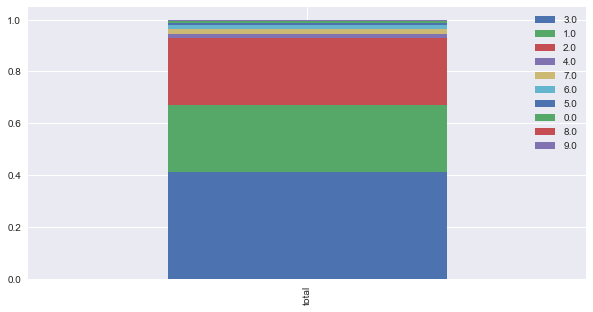

In [67]:
bar_chart_total('TicketFirstChar')

**** Survived ****
1.0    0.409357
3.0    0.277778
2.0    0.274854
7.0    0.011696
9.0    0.008772
4.0    0.005848
5.0    0.005848
6.0    0.002924
0.0    0.002924
Name: TicketFirstChar, dtype: float64

**** dead ****
3.0    0.495446
2.0    0.247723
1.0    0.165756
4.0    0.023679
6.0    0.023679
7.0    0.020036
5.0    0.012750
0.0    0.005464
8.0    0.005464
Name: TicketFirstChar, dtype: float64


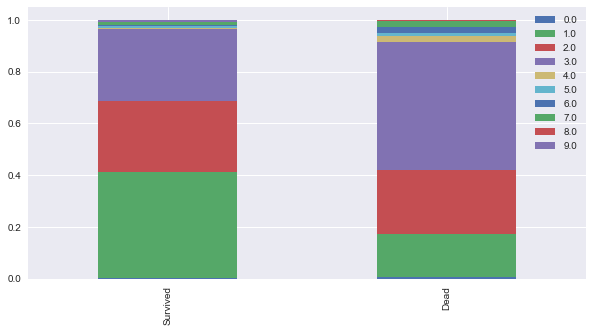

In [68]:
bar_chart('TicketFirstChar')

In [69]:
max_min_normalize('TicketFirstChar')

max_ TicketFirstChar  =  9.0
min_ TicketFirstChar  =  0.0


In [70]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,TicketFirstChar,TicketNumSize
0,1,0,1.0,0,0.2875,0.125,0.0,7.2500,NaN,S,0.222222,5.0
1,2,1,0.0,1,0.4875,0.125,0.0,71.2833,C85,C,0.111111,5.0
2,3,1,1.0,1,0.3375,0.000,0.0,7.9250,NaN,S,0.333333,7.0
3,4,1,0.0,1,0.4500,0.125,0.0,53.1000,C123,S,0.111111,6.0
4,5,0,1.0,0,0.4500,0.000,0.0,8.0500,NaN,S,0.333333,6.0


In [71]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,TicketFirstChar,TicketNumSize
0,892,1.0,0,0.44375,0.000,0.000000,7.8292,NaN,Q,0.333333,6
1,893,1.0,1,0.60000,0.125,0.000000,7.0000,NaN,S,0.333333,6
2,894,0.5,0,0.78750,0.000,0.000000,9.6875,NaN,Q,0.222222,6
3,895,1.0,0,0.35000,0.000,0.000000,8.6625,NaN,S,0.333333,6
4,896,1.0,1,0.28750,0.125,0.111111,12.2875,NaN,S,0.333333,7


## TicketNumSize

가공한 TicketNumSize를 분석한다.

**** Total ****
6.0    0.474747
5.0    0.276094
4.0    0.185185
7.0    0.049383
3.0    0.007856
0.0    0.004489
1.0    0.002245
Name: TicketNumSize, dtype: float64


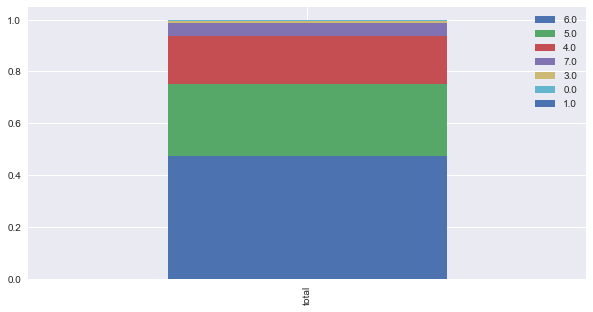

In [72]:
bar_chart_total('TicketNumSize')

**** Survived ****
5.0    0.406433
6.0    0.394737
4.0    0.152047
7.0    0.035088
3.0    0.008772
0.0    0.002924
Name: TicketNumSize, dtype: float64

**** dead ****
6.0    0.524590
4.0    0.205829
5.0    0.194900
7.0    0.058288
3.0    0.007286
0.0    0.005464
1.0    0.003643
Name: TicketNumSize, dtype: float64


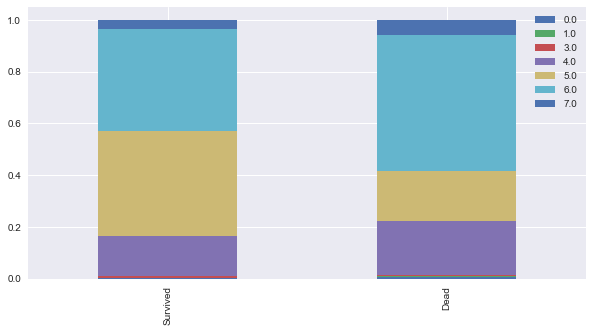

In [73]:
bar_chart('TicketNumSize')

In [74]:
max_min_normalize('TicketNumSize')

max_ TicketNumSize  =  7.0
min_ TicketNumSize  =  0.0


In [75]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,TicketFirstChar,TicketNumSize
0,1,0,1.0,0,0.2875,0.125,0.0,7.2500,NaN,S,0.222222,0.714286
1,2,1,0.0,1,0.4875,0.125,0.0,71.2833,C85,C,0.111111,0.714286
2,3,1,1.0,1,0.3375,0.000,0.0,7.9250,NaN,S,0.333333,1.000000
3,4,1,0.0,1,0.4500,0.125,0.0,53.1000,C123,S,0.111111,0.857143
4,5,0,1.0,0,0.4500,0.000,0.0,8.0500,NaN,S,0.333333,0.857143


In [76]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,TicketFirstChar,TicketNumSize
0,892,1.0,0,0.44375,0.000,0.000000,7.8292,NaN,Q,0.333333,0.857143
1,893,1.0,1,0.60000,0.125,0.000000,7.0000,NaN,S,0.333333,0.857143
2,894,0.5,0,0.78750,0.000,0.000000,9.6875,NaN,Q,0.222222,0.857143
3,895,1.0,0,0.35000,0.000,0.000000,8.6625,NaN,S,0.333333,0.857143
4,896,1.0,1,0.28750,0.125,0.111111,12.2875,NaN,S,0.333333,1.000000


## Fare

test_data에 fare에 Nan이 있다. Nan은 평균으로 처리한다.

In [77]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform("median"), inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform("median"), inplace=True)

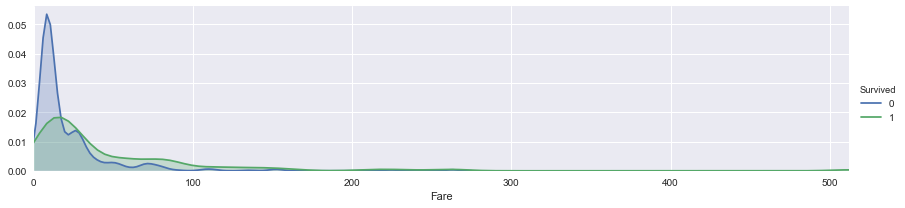

In [78]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.show()

Fare도 normalize 한다.

In [79]:
max_min_normalize('Fare')

max_ Fare  =  512.3292
min_ Fare  =  0.0


In [80]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,TicketFirstChar,TicketNumSize
0,1,0,1.0,0,0.2875,0.125,0.0,0.014151,NaN,S,0.222222,0.714286
1,2,1,0.0,1,0.4875,0.125,0.0,0.139136,C85,C,0.111111,0.714286
2,3,1,1.0,1,0.3375,0.000,0.0,0.015469,NaN,S,0.333333,1.000000
3,4,1,0.0,1,0.4500,0.125,0.0,0.103644,C123,S,0.111111,0.857143
4,5,0,1.0,0,0.4500,0.000,0.0,0.015713,NaN,S,0.333333,0.857143


In [81]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,TicketFirstChar,TicketNumSize
0,892,1.0,0,0.44375,0.000,0.000000,0.015282,NaN,Q,0.333333,0.857143
1,893,1.0,1,0.60000,0.125,0.000000,0.013663,NaN,S,0.333333,0.857143
2,894,0.5,0,0.78750,0.000,0.000000,0.018909,NaN,Q,0.222222,0.857143
3,895,1.0,0,0.35000,0.000,0.000000,0.016908,NaN,S,0.333333,0.857143
4,896,1.0,1,0.28750,0.125,0.111111,0.023984,NaN,S,0.333333,1.000000


## Cabin

앞 글자만 가져온 후, 정해진 값으로 변환한다.

**** Total ****
N    0.771044
C    0.066218
B    0.052750
D    0.037037
E    0.035915
A    0.016835
F    0.014590
G    0.004489
T    0.001122
Name: CabinFirstChar, dtype: float64


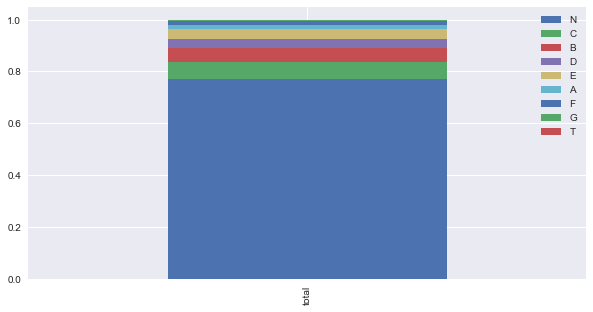

In [82]:
for dataset in train_test_data:
    cabin_first_str = dataset['Cabin'].str.get(0)
    # Nan은 별도의 문자인 'N'으로 처리한다.
    dataset['CabinFirstChar'] = cabin_first_str.fillna('N')
bar_chart_total('CabinFirstChar')

In [83]:
Pcabin_mapping = {'N': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}
for dataset in train_test_data:
    dataset['CabinFirstChar'] = dataset['CabinFirstChar'].map(Pcabin_mapping)

In [84]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,TicketFirstChar,TicketNumSize,CabinFirstChar
0,1,0,1.0,0,0.2875,0.125,0.0,0.014151,NaN,S,0.222222,0.714286,0
1,2,1,0.0,1,0.4875,0.125,0.0,0.139136,C85,C,0.111111,0.714286,3
2,3,1,1.0,1,0.3375,0.000,0.0,0.015469,NaN,S,0.333333,1.000000,0
3,4,1,0.0,1,0.4500,0.125,0.0,0.103644,C123,S,0.111111,0.857143,3
4,5,0,1.0,0,0.4500,0.000,0.0,0.015713,NaN,S,0.333333,0.857143,0


In [85]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,TicketFirstChar,TicketNumSize,CabinFirstChar
0,892,1.0,0,0.44375,0.000,0.000000,0.015282,NaN,Q,0.333333,0.857143,0
1,893,1.0,1,0.60000,0.125,0.000000,0.013663,NaN,S,0.333333,0.857143,0
2,894,0.5,0,0.78750,0.000,0.000000,0.018909,NaN,Q,0.222222,0.857143,0
3,895,1.0,0,0.35000,0.000,0.000000,0.016908,NaN,S,0.333333,0.857143,0
4,896,1.0,1,0.28750,0.125,0.111111,0.023984,NaN,S,0.333333,1.000000,0


In [86]:
max_min_normalize('CabinFirstChar')

max_ CabinFirstChar  =  8
min_ CabinFirstChar  =  0


In [87]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,TicketFirstChar,TicketNumSize,CabinFirstChar
0,1,0,1.0,0,0.2875,0.125,0.0,0.014151,NaN,S,0.222222,0.714286,0.000
1,2,1,0.0,1,0.4875,0.125,0.0,0.139136,C85,C,0.111111,0.714286,0.375
2,3,1,1.0,1,0.3375,0.000,0.0,0.015469,NaN,S,0.333333,1.000000,0.000
3,4,1,0.0,1,0.4500,0.125,0.0,0.103644,C123,S,0.111111,0.857143,0.375
4,5,0,1.0,0,0.4500,0.000,0.0,0.015713,NaN,S,0.333333,0.857143,0.000


In [88]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,TicketFirstChar,TicketNumSize,CabinFirstChar
0,892,1.0,0,0.44375,0.000,0.000000,0.015282,NaN,Q,0.333333,0.857143,0.0
1,893,1.0,1,0.60000,0.125,0.000000,0.013663,NaN,S,0.333333,0.857143,0.0
2,894,0.5,0,0.78750,0.000,0.000000,0.018909,NaN,Q,0.222222,0.857143,0.0
3,895,1.0,0,0.35000,0.000,0.000000,0.016908,NaN,S,0.333333,0.857143,0.0
4,896,1.0,1,0.28750,0.125,0.111111,0.023984,NaN,S,0.333333,1.000000,0.0


cabin은 제거한다.

In [89]:
train.drop(labels='Cabin', axis=1, inplace=True)
test.drop(labels='Cabin', axis=1, inplace=True)

In [90]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketFirstChar,TicketNumSize,CabinFirstChar
0,1,0,1.0,0,0.2875,0.125,0.0,0.014151,S,0.222222,0.714286,0.000
1,2,1,0.0,1,0.4875,0.125,0.0,0.139136,C,0.111111,0.714286,0.375
2,3,1,1.0,1,0.3375,0.000,0.0,0.015469,S,0.333333,1.000000,0.000
3,4,1,0.0,1,0.4500,0.125,0.0,0.103644,S,0.111111,0.857143,0.375
4,5,0,1.0,0,0.4500,0.000,0.0,0.015713,S,0.333333,0.857143,0.000


In [91]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketFirstChar,TicketNumSize,CabinFirstChar
0,892,1.0,0,0.44375,0.000,0.000000,0.015282,Q,0.333333,0.857143,0.0
1,893,1.0,1,0.60000,0.125,0.000000,0.013663,S,0.333333,0.857143,0.0
2,894,0.5,0,0.78750,0.000,0.000000,0.018909,Q,0.222222,0.857143,0.0
3,895,1.0,0,0.35000,0.000,0.000000,0.016908,S,0.333333,0.857143,0.0
4,896,1.0,1,0.28750,0.125,0.111111,0.023984,S,0.333333,1.000000,0.0


## Embarked

Embarked는 C, Q, S, Nan으로 이루어져있다.(C = Cherbourg, Q = Queenstown, S = Southampton)
 같은 방법으로 매핑한다.

In [92]:
Pembarked_mapping = {'C': 1, 'Q': 2, 'S': 3}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(Pembarked_mapping)
    dataset['Embarked'] = dataset['Embarked'].fillna(0)

In [93]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketFirstChar,TicketNumSize,CabinFirstChar
0,1,0,1.0,0,0.2875,0.125,0.0,0.014151,3.0,0.222222,0.714286,0.000
1,2,1,0.0,1,0.4875,0.125,0.0,0.139136,1.0,0.111111,0.714286,0.375
2,3,1,1.0,1,0.3375,0.000,0.0,0.015469,3.0,0.333333,1.000000,0.000
3,4,1,0.0,1,0.4500,0.125,0.0,0.103644,3.0,0.111111,0.857143,0.375
4,5,0,1.0,0,0.4500,0.000,0.0,0.015713,3.0,0.333333,0.857143,0.000


In [94]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketFirstChar,TicketNumSize,CabinFirstChar
0,892,1.0,0,0.44375,0.000,0.000000,0.015282,2,0.333333,0.857143,0.0
1,893,1.0,1,0.60000,0.125,0.000000,0.013663,3,0.333333,0.857143,0.0
2,894,0.5,0,0.78750,0.000,0.000000,0.018909,2,0.222222,0.857143,0.0
3,895,1.0,0,0.35000,0.000,0.000000,0.016908,3,0.333333,0.857143,0.0
4,896,1.0,1,0.28750,0.125,0.111111,0.023984,3,0.333333,1.000000,0.0


In [95]:
max_min_normalize('Embarked')

max_ Embarked  =  3.0
min_ Embarked  =  0.0


In [96]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketFirstChar,TicketNumSize,CabinFirstChar
0,1,0,1.0,0,0.2875,0.125,0.0,0.014151,1.000000,0.222222,0.714286,0.000
1,2,1,0.0,1,0.4875,0.125,0.0,0.139136,0.333333,0.111111,0.714286,0.375
2,3,1,1.0,1,0.3375,0.000,0.0,0.015469,1.000000,0.333333,1.000000,0.000
3,4,1,0.0,1,0.4500,0.125,0.0,0.103644,1.000000,0.111111,0.857143,0.375
4,5,0,1.0,0,0.4500,0.000,0.0,0.015713,1.000000,0.333333,0.857143,0.000


In [97]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketFirstChar,TicketNumSize,CabinFirstChar
0,892,1.0,0,0.44375,0.000,0.000000,0.015282,0.666667,0.333333,0.857143,0.0
1,893,1.0,1,0.60000,0.125,0.000000,0.013663,1.000000,0.333333,0.857143,0.0
2,894,0.5,0,0.78750,0.000,0.000000,0.018909,0.666667,0.222222,0.857143,0.0
3,895,1.0,0,0.35000,0.000,0.000000,0.016908,1.000000,0.333333,0.857143,0.0
4,896,1.0,1,0.28750,0.125,0.111111,0.023984,1.000000,0.333333,1.000000,0.0


## 데이터 분석 완료!

최종 train-test 데이터를 만들어본다.

In [98]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data = train_data.drop('PassengerId', axis=1)
test_data = test.drop('PassengerId', axis=1)

train_data.shape, target.shape, test_data.shape

((891, 10), (891,), (418, 10))

In [99]:
train_data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TicketFirstChar,TicketNumSize,CabinFirstChar
0,1.0,0,0.2875,0.125,0.000000,0.014151,1.000000,0.222222,0.714286,0.000
1,0.0,1,0.4875,0.125,0.000000,0.139136,0.333333,0.111111,0.714286,0.375
2,1.0,1,0.3375,0.000,0.000000,0.015469,1.000000,0.333333,1.000000,0.000
3,0.0,1,0.4500,0.125,0.000000,0.103644,1.000000,0.111111,0.857143,0.375
4,1.0,0,0.4500,0.000,0.000000,0.015713,1.000000,0.333333,0.857143,0.000
5,1.0,0,0.0000,0.000,0.000000,0.016510,0.666667,0.333333,0.857143,0.000
6,0.0,0,0.6875,0.000,0.000000,0.101229,1.000000,0.111111,0.714286,0.625
7,1.0,0,0.0375,0.375,0.111111,0.041136,1.000000,0.333333,0.857143,0.000
8,1.0,1,0.3500,0.000,0.222222,0.021731,1.000000,0.333333,0.857143,0.000
9,0.5,1,0.1875,0.125,0.000000,0.058694,0.333333,0.222222,0.857143,0.000


In [100]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Pclass             891 non-null float64
Sex                891 non-null int64
Age                891 non-null float64
SibSp              891 non-null float64
Parch              891 non-null float64
Fare               891 non-null float64
Embarked           891 non-null float64
TicketFirstChar    891 non-null float32
TicketNumSize      891 non-null float64
CabinFirstChar     891 non-null float64
dtypes: float32(1), float64(8), int64(1)
memory usage: 66.2 KB


# Modelling

In [101]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

### Cross Validation

In [102]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## KNN

In [103]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
score

array([0.8       , 0.83146067, 0.7752809 , 0.79775281, 0.85393258,
       0.78651685, 0.76404494, 0.78651685, 0.80898876, 0.79775281])

In [104]:
round(np.mean(score)*100, 2)

80.02

## Decision Tree

In [105]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.7752809  0.79775281 0.75280899 0.75280899 0.74157303
 0.78651685 0.68539326 0.71910112 0.80898876]


In [106]:
# decision tree Score
round(np.mean(score)*100, 2)

75.98

## Random Forest

In [107]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.88764045 0.78651685 0.78651685 0.7752809  0.85393258
 0.85393258 0.74157303 0.75280899 0.78651685]


In [108]:
# Random Forest Score
round(np.mean(score)*100, 2)

79.91

## Naive Bayes

In [109]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.80898876 0.75280899 0.73033708 0.7752809  0.78651685
 0.76404494 0.79775281 0.7752809  0.76404494]


In [110]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

77.88

## SVM

In [111]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.7752809  0.78651685 0.75280899 0.79775281 0.78651685
 0.78651685 0.78651685 0.79775281 0.79775281]


In [112]:
round(np.mean(score)*100,2)

78.67

## Testing

In [113]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass             418 non-null float64
Sex                418 non-null int64
Age                418 non-null float64
SibSp              418 non-null float64
Parch              418 non-null float64
Fare               418 non-null float64
Embarked           418 non-null float64
TicketFirstChar    418 non-null float32
TicketNumSize      418 non-null float64
CabinFirstChar     418 non-null float64
dtypes: float32(1), float64(8), int64(1)
memory usage: 31.1 KB


In [114]:
clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data, target)

prediction = clf.predict(test_data)

In [115]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [116]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [117]:
train.to_csv('train_preprocessed.csv', index=False)
test.to_csv('test_preprocessed.csv', index=False)

## Result

![tensorboard](./RandomForest.PNG)